In [1]:
from ethz_snow.snowfall import Snowfall
from ethz_snow.operatingConditions import OperatingConditions
import numpy as np

In [2]:
#setting the operating conditions for the validation test

d = {"int": 0, "ext": 0, "s0": 20, "s_sigma_rel": 0.1} 
c = {"rate": 0.5 / 60, "start": 20, "end": -50}

#multiple holding steps: h = [dict(duration=90*60, temp=-5), dict(duration=90*60, temp=-10)]
h = [dict(duration=30*60, temp=-5)]

op = OperatingConditions(t_tot=3e4,cooling= c,holding = h, cnTemp = -5  )

#1000 simulations for each validation test
S = Snowfall(pool_size=8,k=d,Nrep=1000,N_vials=(7,7,1),opcond=op)


In [26]:
S.run()

In [27]:
S.simulationStatus

1

In [11]:
nucTemps = S._returnStats(what="Tnuc")
np.savetxt('nT_HTcont.csv',nucTemps, delimiter=',')

In [9]:
soltimes = S.solidificationTimes()
np.savetxt('tsol_HTcont.csv',soltimes, delimiter=',')

In [10]:
nuctimes = S.nucleationTimes()
np.savetxt('tnuc_HTcont.csv',nuctimes, delimiter=',')

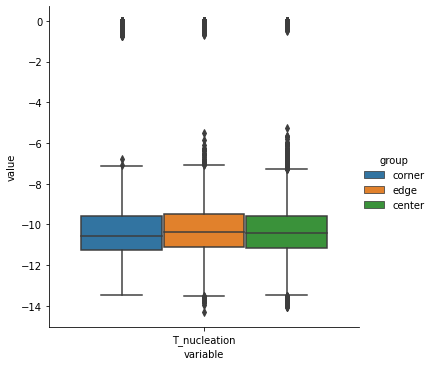

In [28]:
S.plot(what="T_nucleation")